# Sampling in Python

## Introduction to Sampling

### Sampling and Point Estimates

In [1]:
# pip install pyarrow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
spotify_population = pd.read_feather(r'./data/spotify_2000_2020.feather')
print(spotify_population.shape)
spotify_population.head()

(41656, 20)


,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


In [3]:
import pprint as pp
import tabulate

In [4]:

# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(tabulate.tabulate(spotify_sample.head(), headers='keys', tablefmt='psql'))

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population['duration_minutes'].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample['duration_minutes'].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

+-------+----------------+---------------------------------+----------------+---------------+--------------------+----------+------------+------------------------+--------------------+-------+------------+------------+--------+--------------------------------+--------------+----------------+---------------+---------+-----------+--------+
|       |   acousticness | artists                         |   danceability |   duration_ms |   duration_minutes |   energy |   explicit | id                     |   instrumentalness |   key |   liveness |   loudness |   mode | name                           |   popularity | release_date   |   speechiness |   tempo |   valence |   year |
|-------+----------------+---------------------------------+----------------+---------------+--------------------+----------+------------+------------------------+--------------------+-------+------------+------------+--------+--------------------------------+--------------+----------------+---------------+---------+--

In [5]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population['loudness']

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.68529


### Convenience Sampling

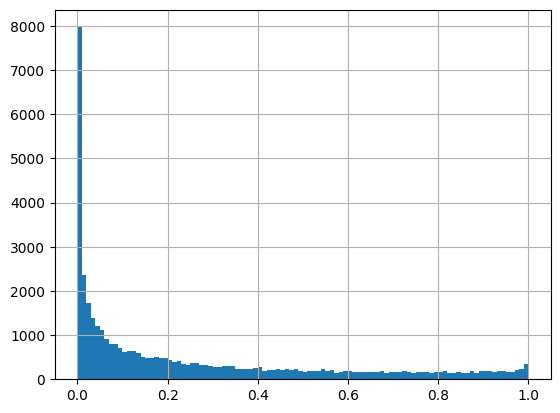

In [6]:
spotify_population['acousticness'].hist(bins=np.arange(0, 1.01, 0.01))
plt.show();

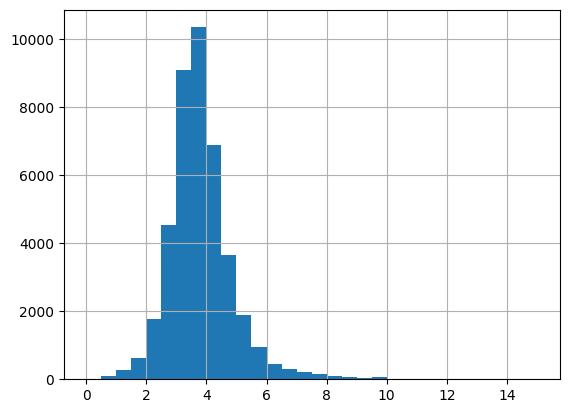

In [7]:
# Update the histogram to use spotify_mysterious_sample2
spotify_population['duration_minutes'].hist(bins=np.arange(0, 15.5, 0.5))
plt.show();

### Pseudo-random number generation

In [8]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Print uniforms
print(uniforms)

[-2.5828627   2.63415745  2.60698381 ...  0.34944829  0.38408783
  1.90708693]


In [9]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Print normals
print(normals)

[6.04447915 5.55609715 6.07226152 ... 7.55597426 6.73310337 3.16645012]


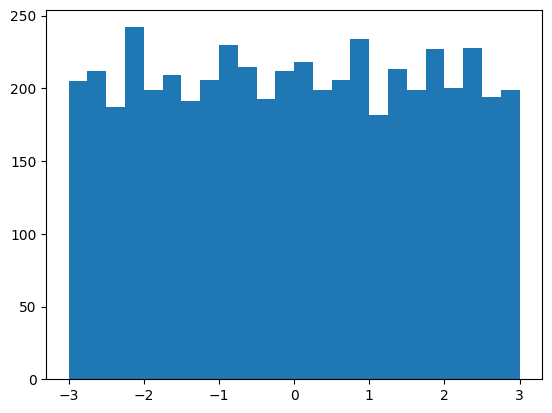

In [10]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3,3.25, 0.25))
plt.show();

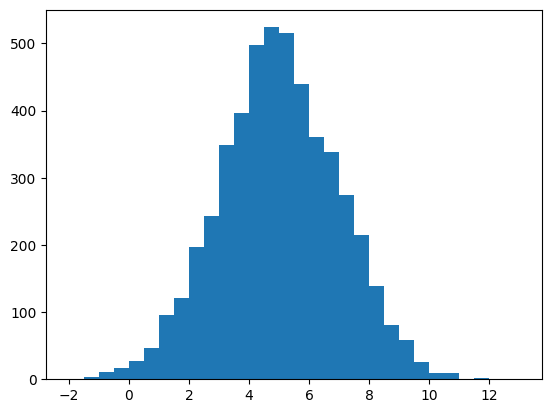

In [11]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, np.arange(-2, 13.5, 0.5))
plt.show()

## Sampling Methods

### Simple random and systematic sampling

In [12]:
attrition = pd.read_feather(r'./data/attrition.feather')
print(attrition.shape)
attrition.head()

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0


In [13]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition.sample(n=70, random_state=18900217)

# Print the sample
print(attrition_samp.shape)
attrition_samp.head()

(70, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


In [14]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition
pop_size = len(attrition)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition.iloc[::interval]

# Print the sample
print(attrition_sys_samp.shape)
attrition_sys_samp.head()

(70, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
21,19,0.0,Travel_Rarely,1181,Research_Development,3,Below_College,Medical,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
42,45,0.0,Travel_Rarely,252,Research_Development,2,Bachelor,Life_Sciences,Medium,Female,...,Excellent,Very_High,0,1,3,Better,1,0,0,0
63,23,0.0,Travel_Rarely,373,Research_Development,1,College,Life_Sciences,Very_High,Male,...,Outstanding,Very_High,1,1,2,Better,1,0,0,1
84,30,1.0,Travel_Rarely,945,Sales,9,Bachelor,Medical,Medium,Male,...,Excellent,High,0,1,3,Good,1,0,0,0


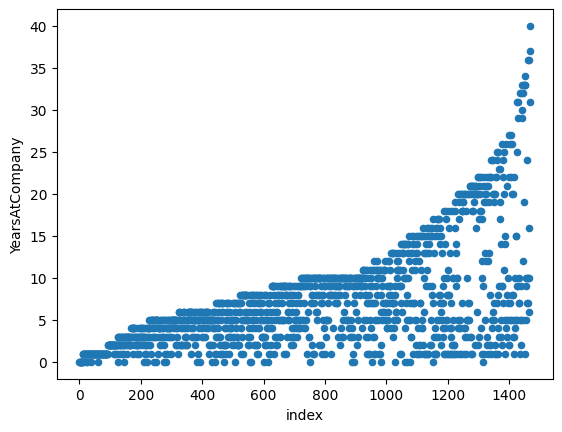

In [15]:
# Add an index column to attrition
attrition_id = attrition.reset_index()

# Plot YearsAtCompany vs. index for attrition_id
attrition_id.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show();

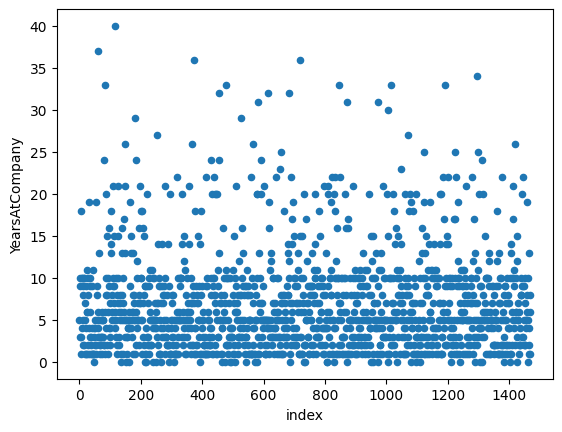

In [16]:
# Shuffle the rows of attrition
attrition_shuffled = attrition.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x='index', y='YearsAtCompany', kind='scatter')
plt.show()

### Stratified and weighted random sampling

In [17]:
coffee = pd.read_feather(r'./data/coffee_ratings_full.feather')
print(coffee.shape)
coffee.head(3)

(1338, 43)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0


In [18]:
# Proportion of employees by Education level
attrition['Education'].value_counts(normalize=True)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64

In [19]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition.groupby('Education').sample(frac=0.4, random_state=2022)


# Print the sample
attrition_strat

C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\2549988468.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_strat = attrition.groupby('Education').sample(frac=0.4, random_state=2022)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1191,53,0.0,Travel_Rarely,238,Sales,1,Below_College,Medical,Very_High,Female,...,Outstanding,Very_High,0,18,2,Best,14,7,8,10
407,29,0.0,Travel_Frequently,995,Research_Development,2,Below_College,Life_Sciences,Low,Male,...,Excellent,Very_High,1,6,0,Best,6,4,1,3
1233,59,0.0,Travel_Frequently,1225,Sales,1,Below_College,Life_Sciences,Low,Female,...,Excellent,Very_High,0,20,2,Good,4,3,1,3
366,37,0.0,Travel_Rarely,571,Research_Development,10,Below_College,Life_Sciences,Very_High,Female,...,Excellent,Medium,2,6,3,Good,5,3,4,3
702,31,0.0,Travel_Frequently,163,Research_Development,24,Below_College,Technical_Degree,Very_High,Female,...,Outstanding,Very_High,0,9,3,Good,5,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,38,0.0,Travel_Frequently,653,Research_Development,29,Doctor,Life_Sciences,Very_High,Female,...,Excellent,Very_High,0,10,2,Better,10,3,9,9
1061,44,0.0,Travel_Frequently,602,Human_Resources,1,Doctor,Human_Resources,Low,Male,...,Excellent,High,0,14,3,Better,10,7,0,2
1307,41,0.0,Travel_Rarely,1276,Sales,2,Doctor,Life_Sciences,Medium,Female,...,Excellent,Medium,1,22,2,Better,18,16,11,8
1060,33,0.0,Travel_Rarely,516,Research_Development,8,Doctor,Life_Sciences,Very_High,Male,...,Excellent,Low,0,14,6,Better,0,0,0,0


In [20]:
# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389456
Master           0.270408
College          0.192177
Below_College    0.115646
Doctor           0.032313
Name: proportion, dtype: float64


In [21]:
# Get 30 employees from each Education group
attrition_eq = attrition.groupby('Education')\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\4141168895.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_eq = attrition.groupby('Education')\


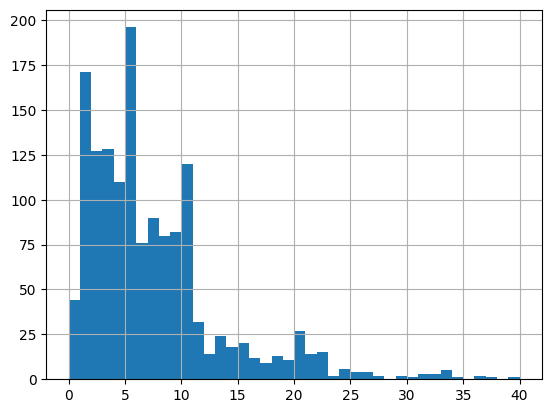

In [22]:
# Plot YearsAtCompany from attrition as a histogram
attrition['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition.sample(frac=0.1, weights='YearsAtCompany')

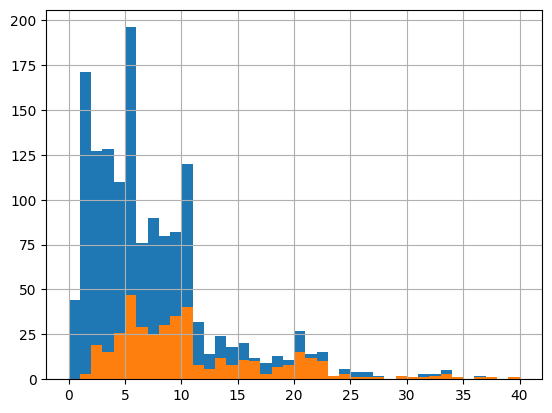

In [23]:
# Plot YearsAtCompany from attrition as a histogram
attrition['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany from attrition_weight as a histogram
attrition_weight['YearsAtCompany'].hist(bins=np.arange(0,41,1))
plt.show()

In [24]:
print(attrition['YearsAtCompany'].mean(), attrition_weight['YearsAtCompany'].mean())

7.0081632653061225 10.52


### Cluster sampling

In [25]:
import random
# Create a list of unique JobRole values
job_roles_pop = list(attrition['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

['Human_Resources', 'Manager', 'Manufacturing_Director', 'Research_Scientist']


In [26]:
attrition.dtypes

Age                            int32
Attrition                    float64
BusinessTravel              category
DailyRate                      int32
Department                  category
DistanceFromHome               int32
Education                   category
EducationField              category
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int32
JobInvolvement              category
JobLevel                       int32
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int32
MonthlyRate                    int32
NumCompaniesWorked             int32
OverTime                    category
PercentSalaryHike              int32
PerformanceRating           category
RelationshipSatisfaction    category
StockOptionLevel               int32
TotalWorkingYears              int32
TrainingTimesLastYear          int32
WorkLifeBalance             category
Y

In [27]:
# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition[jobrole_condition]

# Print the result
print(attrition_filtered['JobRole'].value_counts())

JobRole
Research_Scientist           292
Manufacturing_Director       145
Manager                      102
Human_Resources               52
Healthcare_Representative      0
Laboratory_Technician          0
Research_Director              0
Sales_Executive                0
Sales_Representative           0
Name: count, dtype: int64


In [28]:
attrition_filtered.loc['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
print(attrition_filtered['JobRole'].value_counts())

JobRole
Research_Scientist           292
Manufacturing_Director       145
Manager                      102
Human_Resources               52
Healthcare_Representative      0
Laboratory_Technician          0
Research_Director              0
Sales_Executive                0
Sales_Representative           0
Name: count, dtype: int64


C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\3873265533.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  attrition_filtered.loc['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\3873265533.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  attrition_filtered.loc['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\3873265533.py:1: FutureWarning

In [32]:
# # Randomly sample 10 employees from each sampled job role
# attrition_clust = attrition_filtered.groupby('JobRole').sample(n=10, random_state=2022, observed=False)


# # Print the sample
# print(attrition_clust)

In [33]:
# Create a list of unique JobRole values
job_roles_pop = list(attrition['JobRole'].unique())

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop, k=4)

# Filter for rows where JobRole is in job_roles_samp
jobrole_condition = attrition['JobRole'].isin(job_roles_samp)
attrition_filtered = attrition[jobrole_condition]

# Remove categories with no rows
attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole")\
    .sample(n=10, random_state=2022)

# Print the sample
print(attrition_clust['JobRole'].value_counts())         

JobRole
Healthcare_Representative    10
Human_Resources              10
Manufacturing_Director       10
Sales_Representative         10
Name: count, dtype: int64


C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\156858761.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()
C:\Users\anshu\AppData\Local\Temp\ipykernel_37420\156858761.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attrition_clust = attrition_filtered.groupby("JobRole")\


## Sampling Distributions

### Relative error of point estimates

In [34]:
print(coffee.shape)
coffee.head(2)

(1338, 43)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [35]:
print(f'Mean of total_cup_points from whole dataset {coffee["total_cup_points"].mean():.2f}\n\
from sample of 10 {coffee.sample(n=10)["total_cup_points"].mean():.2f}\n\
from sample of 100 {coffee.sample(n=100)["total_cup_points"].mean():.2f}\n\
and from sample of 500 {coffee.sample(n=500)["total_cup_points"].mean():.2f}')

Mean of total_cup_points from whole dataset 82.15
from sample of 10 82.22
from sample of 100 81.72
and from sample of 500 82.15


#### Relative Error

In [36]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition.sample(n=50, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(attrition['Attrition'].mean()-mean_attrition_srs50)/attrition['Attrition'].mean()

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


In [37]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition.sample(n=100, random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100['Attrition'].mean()
mean_attrition = attrition['Attrition'].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition-mean_attrition_srs100)/mean_attrition

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


### Creating a sampling distribution

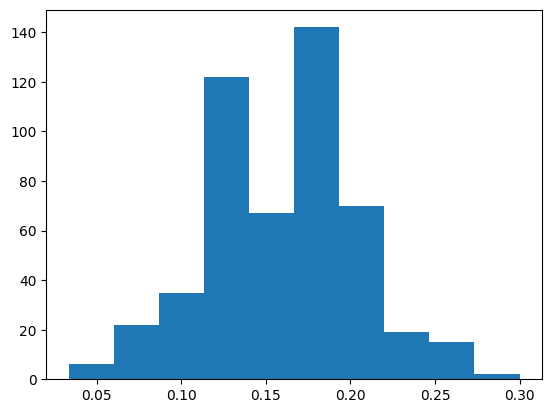

In [38]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for _ in range(500):
	mean_attritions.append(
    	attrition.sample(n=60)['Attrition'].mean()
	)

# Create a histogram of the 500 sample means
plt.hist(mean_attritions)
plt.show()

### Approximate Sampling Distributions

In [39]:
import itertools
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows, columns=data_dict.keys())

expand_grid({
  'a':range(3),
  'b':range(3)}
)

,a,b
0,0,0
1,0,1
2,0,2
3,1,0
4,1,1
5,1,2
6,2,0
7,2,1
8,2,2


In [40]:
dice = expand_grid(
  {'die1':range(1,7),
   'die2':range(1,7),
   'die3':range(1,7),
   'die4':range(1,7)
  #  'die5':range(1,7),
  #  'die6':range(1,7)
  }
)
dice['mean_roll'] = (dice['die1']+dice['die2']+dice['die3']+dice['die4'])/4
dice.head()

,die1,die2,die3,die4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00


(1296, 5)


<Axes: xlabel='mean_roll'>

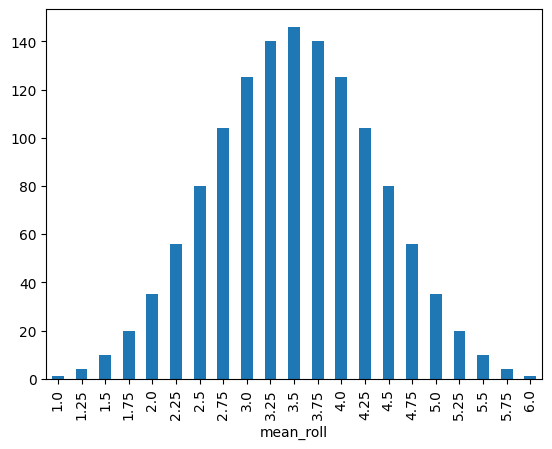

In [41]:
print(dice.shape)
dice['mean_roll'] = dice['mean_roll'].astype('category')
dice['mean_roll'].value_counts(sort=False).plot(kind='bar')

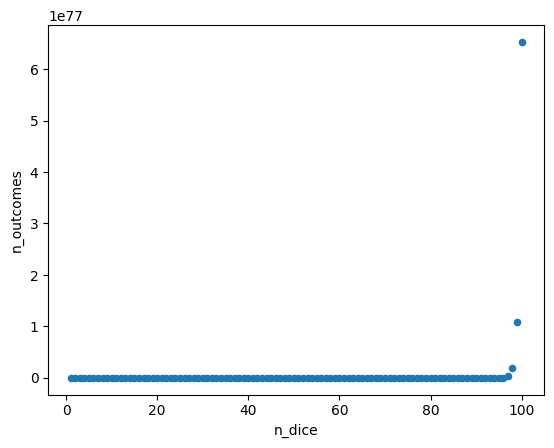

In [42]:
n_dice = range(1,101)
n_outcomes=[]
for _ in n_dice:
  n_outcomes.append(6**_)

outcomes = pd.DataFrame(
  {'n_dice': list(n_dice)
   ,'n_outcomes':n_outcomes
   }
)
outcomes.plot(
  x='n_dice'
  , y='n_outcomes'
  , kind='scatter'
)
plt.show()

In [43]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(range(1,9), size=5, replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.6


In [44]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for _ in range(1000):
    sample_means_1000.append(
  		np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )
    
# Print the first 10 entries of the result
print(sample_means_1000[0:10])

[3.2, 4.8, 5.0, 5.2, 4.2, 6.6, 4.6, 5.0, 4.6, 6.2]


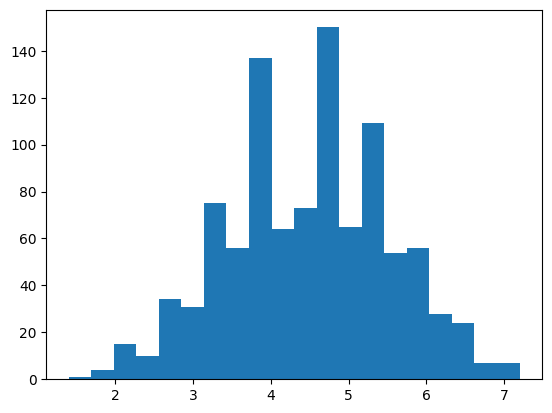

In [45]:
# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()

### Standard errors and the Central Limit Theorem


In [46]:
# Gaussian Distribution / Normal Distribution
sampling_distribution_5 = [np.random.choice(attrition['Attrition'], size=5, replace=True).mean() for _ in range(1000)]
sampling_distribution_50 = [np.random.choice(attrition['Attrition'], size=50, replace=True).mean() for _ in range(1000)]
sampling_distribution_500 = [np.random.choice(attrition['Attrition'], size=500, replace=True).mean() for _ in range(1000)]

In [47]:
# Calculate the mean of the mean attritions for each sampling distribution
mean_of_means_5 = np.mean(sampling_distribution_5)
mean_of_means_50 = np.mean(sampling_distribution_50)
mean_of_means_500 = np.mean(sampling_distribution_500)

# Print the results
print(mean_of_means_5)
print(mean_of_means_50)
print(mean_of_means_500)

0.16960000000000003
0.15932000000000004
0.16118599999999997


In [48]:
# Calculate the std. dev. of the mean attritions for each sampling distribution
sd_of_means_5 = np.std(sampling_distribution_5, ddof=1)
sd_of_means_50 = np.std(sampling_distribution_50, ddof=1)
sd_of_means_500 = np.std(sampling_distribution_500, ddof=1)

# Print the results
print(sd_of_means_5)
print(sd_of_means_50)
print(sd_of_means_500)

0.16462971464150372
0.05238971542471177
0.016201354507814708


## Bootstrap Distributions

### Introduction to bootstrapping

In [49]:
coffee_sample = coffee[['variety', 'country_of_origin', 'flavor']].reset_index().sample(n=500)

In [50]:
import numpy as np
mean_floavours_5000 =[]
for _ in range(5000):
  mean_floavours_5000.append(
    np.mean(coffee_sample.sample(frac=1, replace=True)['flavor'])
  )
bootstrap_distn = mean_floavours_5000

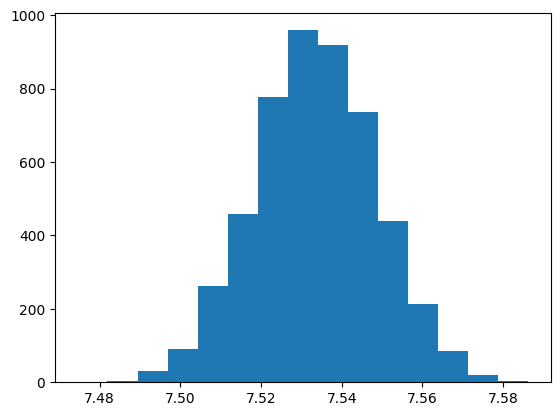

In [51]:
import matplotlib.pyplot as plt
plt.hist(bootstrap_distn, bins=15)
plt.show();

In [52]:
coffee['flavor'].mean()

7.526046337817639

In [53]:
coffee_sample['flavor'].mean()

7.53372

In [54]:
np.mean(bootstrap_distn)

7.533568396

In [55]:
print(f"Std Dev ==> df={coffee['flavor'].std()}, sample={coffee_sample['flavor'].std()}, boot={np.std(bootstrap_distn)}")

Std Dev ==> df=0.3413824079927851, sample=0.3411658686032347, boot=0.01505172781534346


In [56]:
print(f"Std Dev ==> df={coffee['flavor'].std()}, sample={coffee_sample['flavor'].std()}, boot={np.std(bootstrap_distn, ddof=1)}")

Std Dev ==> df=0.3413824079927851, sample=0.3411658686032347, boot=0.015053233213938548


In [57]:
spotify_population = pd.read_feather(r'./data/spotify_2000_2020.feather')
mean_popularity_2000_samp = []

# Generate a sampling distribution of 2000 replicates
for _ in range(2000):
    mean_popularity_2000_samp.append(
    	# Sample 500 rows and calculate the mean popularity 
    	np.mean( spotify_population.sample(n=500)['popularity'].mean())
    )

# Print the sampling distribution results
print(mean_popularity_2000_samp)

[54.83, 54.984, 54.888, 55.092, 55.122, 54.286, 54.414, 54.788, 54.604, 56.086, 54.064, 54.312, 54.856, 54.584, 55.018, 55.374, 55.464, 55.86, 55.032, 54.672, 54.488, 54.728, 55.81, 55.212, 55.3, 55.148, 55.718, 54.9, 54.566, 54.858, 54.898, 54.378, 54.686, 54.998, 54.384, 55.288, 55.454, 54.322, 54.246, 55.488, 53.892, 54.938, 54.664, 54.372, 55.0, 55.48, 55.016, 54.576, 54.728, 55.452, 54.944, 55.052, 54.264, 54.448, 54.272, 54.45, 54.508, 55.962, 54.084, 54.586, 54.686, 54.634, 53.662, 54.5, 54.78, 55.25, 54.49, 54.668, 54.816, 54.328, 54.932, 55.256, 54.218, 55.054, 54.7, 54.13, 54.698, 55.8, 55.222, 54.988, 55.122, 54.348, 55.642, 54.99, 55.252, 54.7, 54.702, 56.036, 55.352, 54.952, 54.598, 53.99, 54.63, 56.176, 54.676, 55.072, 54.782, 54.422, 54.462, 54.702, 54.816, 54.464, 54.886, 54.484, 54.224, 54.37, 54.502, 54.808, 56.02, 54.75, 55.5, 55.224, 54.668, 54.62, 54.738, 55.206, 55.666, 54.696, 54.518, 54.45, 55.236, 54.47, 55.268, 54.792, 54.17, 54.186, 54.458, 54.698, 54.876, 55

In [58]:
mean_popularity_2000_boot = []

# Generate a bootstrap distribution of 2000 replicates
for _ in range(2000):
    mean_popularity_2000_boot.append(
    	# Resample 500 rows and calculate the mean popularity     
    	np.mean( spotify_sample.sample(frac=1, replace=True)['popularity'].mean())
    )

# Print the bootstrap distribution results
print(mean_popularity_2000_boot)

[53.741, 53.796, 54.208, 54.242, 54.269, 54.064, 54.346, 53.938, 54.547, 53.557, 53.892, 54.15, 54.32, 54.402, 54.67, 54.435, 53.911, 54.211, 54.609, 53.687, 54.312, 54.174, 54.127, 54.702, 54.128, 54.159, 53.793, 53.987, 54.372, 54.267, 53.427, 53.667, 53.869, 53.907, 54.54, 54.445, 53.925, 54.343, 54.696, 54.857, 54.275, 54.372, 54.256, 54.232, 54.414, 54.085, 53.795, 54.36, 54.359, 53.621, 54.473, 53.799, 54.222, 54.015, 54.465, 54.327, 54.27, 54.151, 54.233, 54.672, 53.893, 53.987, 54.164, 54.133, 53.772, 53.415, 54.533, 54.191, 54.212, 54.748, 54.129, 54.142, 53.614, 54.18, 54.446, 54.297, 53.863, 54.165, 53.87, 53.67, 54.452, 54.295, 54.052, 53.798, 53.978, 54.066, 54.048, 53.774, 54.531, 54.103, 54.27, 54.036, 54.265, 53.781, 54.096, 54.124, 54.794, 54.211, 54.665, 55.035, 53.277, 54.204, 53.745, 54.064, 53.924, 54.288, 54.176, 53.867, 54.175, 54.45, 53.79, 54.748, 53.987, 54.252, 53.374, 54.159, 55.014, 54.091, 54.269, 54.455, 54.625, 54.204, 54.162, 53.646, 54.148, 53.77, 53.9

In [59]:
# Calculate the population mean popularity
pop_mean = spotify_population['popularity'].mean()

# Calculate the original sample mean popularity
samp_mean = spotify_sample['popularity'].mean()

# Calculate the sampling dist'n estimate of mean popularity
samp_distn_mean = np.mean(mean_popularity_2000_samp)

# Calculate the bootstrap dist'n estimate of mean popularity
boot_distn_mean = np.mean(mean_popularity_2000_boot)

# Print the means
print([pop_mean, samp_mean, samp_distn_mean, boot_distn_mean])

[54.837142308430955, 54.165, 54.817728, 54.1692635]


In [60]:
# Calculate the population std dev popularity
pop_sd = spotify_population['popularity'].std(ddof=0)

# Calculate the original sample std dev popularity
samp_sd = spotify_sample['popularity'].std()

# Calculate the sampling dist'n estimate of std dev popularity
samp_distn_sd = np.std(mean_popularity_2000_samp, ddof=1) * np.sqrt(5000)

# Calculate the bootstrap dist'n estimate of std dev popularity
boot_distn_sd = np.std(mean_popularity_2000_boot, ddof=1) * np.sqrt(5000)

# Print the standard deviations
print([pop_sd, samp_sd, samp_distn_sd, boot_distn_sd])

[10.880065274257536, 10.403172641122563, 34.27134915299343, 23.82830426994209]


### Confidence Intervals

In [61]:
import re
val = 'WILLiamSHAKs'
vals = re.findall('([A-Z]+)', val)
max_len = max([len(_) for _ in vals])
longest = [_ for _ in vals if len(_)==max_len]
if longest:
  ','.join(longest)
else:
  ''
# print(max(vals, key=len))

In [62]:
import re
def get_longest_in_list(lst):
    for val in lst:
        vals = re.findall('([A-Z]+)', val)
        mx_ln = len(max(vals, key=len)) if vals else ''
        yield {val: ','.join([_ for _ in vals if len(_)==mx_ln])}

for _ in get_longest_in_list(['WILLiamSHAKes', 'WILLiamSHAKEs']):
    print(_)

{'WILLiamSHAKes': 'WILL,SHAK'}
{'WILLiamSHAKEs': 'SHAKE'}


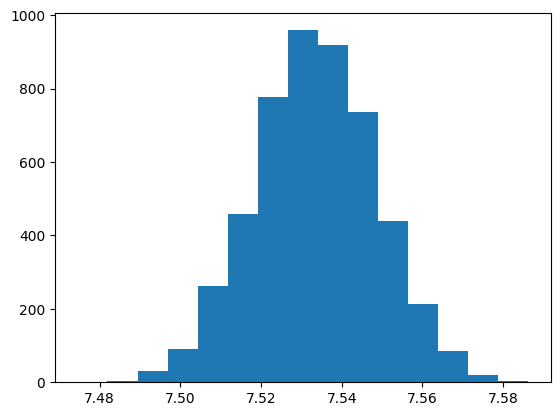

In [63]:
import matplotlib.pyplot as plt
plt.hist(bootstrap_distn, bins=15)
plt.show()

In [65]:
# Generate a 95% confidence interval using the quantile method
lower_quant = np.quantile(mean_popularity_2000_boot, 0.025)
upper_quant = np.quantile(mean_popularity_2000_boot, 0.975)

# Print quantile method confidence interval
print((lower_quant, upper_quant))

(53.5119, 54.813)
